In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
def handle_null_values(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [29]:
# Passenger Id, Cabin Number, Ticket Number - do not provide any valuable information
# Passenger Id and Ticket Number are all unique values
def drop_columns(df):
    columns_to_drop = ['PassengerId', 'Cabin', 'Ticket']
    df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
handle_null_values(train)
drop_columns(train)

In [ ]:
handle_null_values(test)
drop_columns(test)

In [79]:
#Feature Engineering
def create_family_size_feature(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
def create_is_alone_feature(df):
    df['IsAlone'] = df['IsAlone'] = 1
    df['IsAlone'].loc[df['FamilySize'] > 1] = 0
    
def create_title_feature(df):
    df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    title_counts = df['Title'].value_counts()
    titles_to_replace = title_counts[title_counts <= 7].index
    df['Title'] = df['Title'].apply(lambda x: 'Other' if x in titles_to_replace else x)
    
def create_bin_features(df):
    df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)
    df['FareBin'] = pd.cut(df['Fare'].astype(int), 4)

In [71]:
create_family_size_feature(train)
create_is_alone_feature(train)
create_title_feature(train)

C:\Users\gdany\AppData\Local\Temp\ipykernel_3032\779512786.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0


In [72]:
create_family_size_feature(test)
create_is_alone_feature(test)
create_title_feature(test)

C:\Users\gdany\AppData\Local\Temp\ipykernel_3032\779512786.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0


In [80]:
create_bin_features(train)
create_bin_features(test)

In [81]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  AgeBin      891 non-null    category
 13  FareBin     891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(16.0, 32.0]","(-0.512, 128.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(32.0, 48.0]","(-0.512, 128.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(16.0, 32.0]","(-0.512, 128.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(32.0, 48.0]","(-0.512, 128.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(32.0, 48.0]","(-0.512, 128.0]"


In [82]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
Target = ['Survived']

def code_categorical_data(df):
    # Objects to categorical data
    df['Sex_Code'] = label.fit_transform(df['Sex'])
    df['Embarked_Code'] = label.fit_transform(df['Embarked'])
    df['Title_Code'] = label.fit_transform(df['Title'])
    # Bins to categorical data
    df['AgeBin_Code'] = label.fit_transform(df['AgeBin'])
    df['FareBin_Code'] = label.fit_transform(df['FareBin'])

In [83]:
code_categorical_data(train)
code_categorical_data(test)

In [84]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(16.0, 32.0]","(-0.512, 128.0]",1,2,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(32.0, 48.0]","(-0.512, 128.0]",0,0,3,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(16.0, 32.0]","(-0.512, 128.0]",0,2,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(32.0, 48.0]","(-0.512, 128.0]",0,2,3,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(32.0, 48.0]","(-0.512, 128.0]",1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Other,"(16.0, 32.0]","(-0.512, 128.0]",1,2,4,1,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(16.0, 32.0]","(-0.512, 128.0]",0,2,1,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(16.0, 32.0]","(-0.512, 128.0]",0,2,1,1,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr,"(16.0, 32.0]","(-0.512, 128.0]",1,0,2,1,0


In [111]:
original_features = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 
bin_features = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
bin_target_features = Target + bin_features
original_target_features =  Target + original_features
print(original_target_features)

['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']


In [95]:
for x in original_features:
    if train[x].dtype != 'float64' :
        print("Survival rates for: " + x)
        print(train[[x, Target[0]]].groupby(x, as_index=False).mean())

Survival rates for: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
Survival rates for: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Survival rates for: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
Survival rates for: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.697802
2      Mr  0.156673
3     Mrs  0.792000
4   Other  0.444444
Survival rates for: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
Survival rates for: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
Survival rates for: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.13

In [108]:
import seaborn as sns
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [128]:
# Graph distribution for quantitative data

Text(0.5, 1.0, 'FamilySize by Survival')

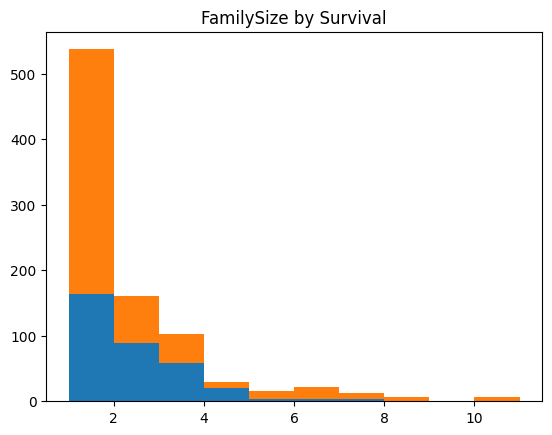

In [115]:
plt.hist(x = [train[train['Survived']==1]['FamilySize'], train[train['Survived']==0]['FamilySize']],
         stacked=True, label = ['Survived','Dead'])
plt.title('FamilySize by Survival')

<Axes: xlabel='Embarked', ylabel='Survived'>

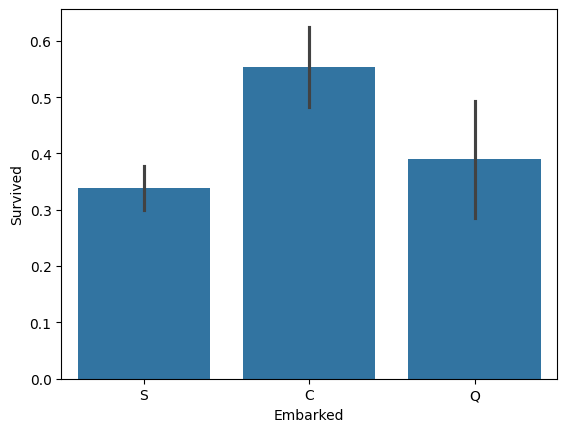

In [117]:
sns.barplot(x = 'Embarked', y = 'Survived', data=train)
# C = Cherbourg; Q = Queenstown, S = Southampton

<Axes: xlabel='IsAlone', ylabel='Survived'>

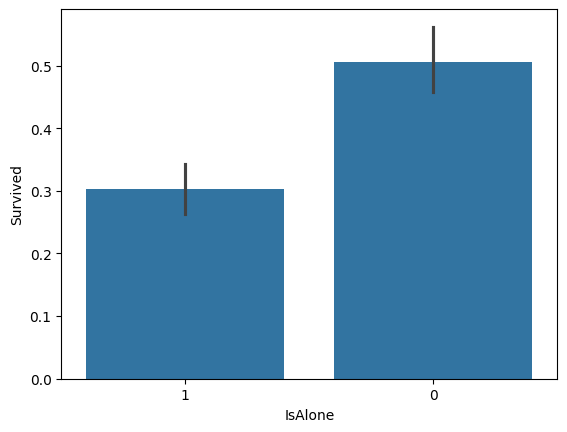

In [118]:
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train)

<Axes: xlabel='Pclass', ylabel='Survived'>

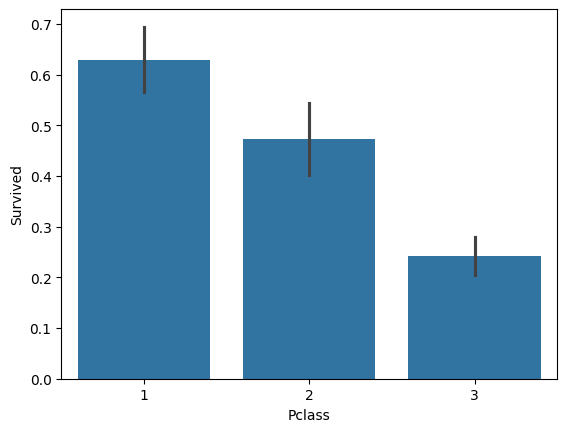

In [119]:
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train)

<Axes: xlabel='Sex', ylabel='Survived'>

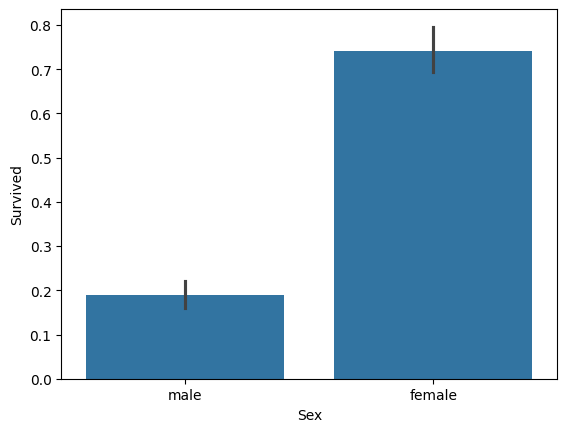

In [121]:
sns.barplot(x = 'Sex', y = 'Survived', data=train)

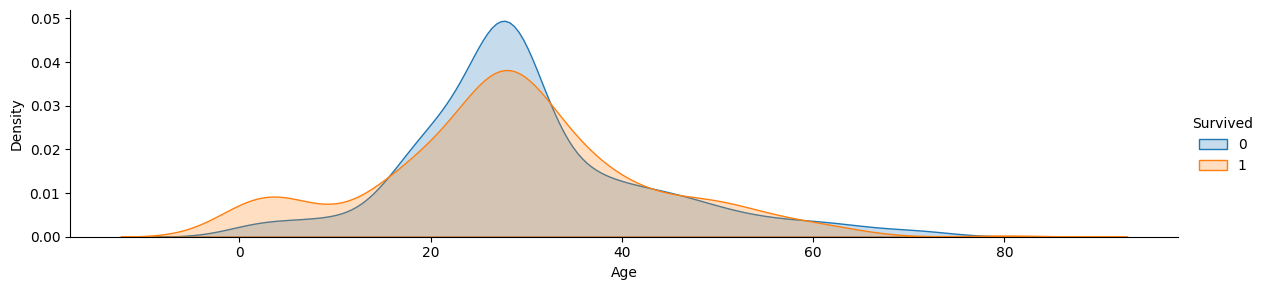

In [130]:
age_facet_grid = sns.FacetGrid(train, hue='Survived', aspect=4)
age_facet_grid.map(sns.kdeplot, 'Age', fill=True)
age_facet_grid.add_legend()

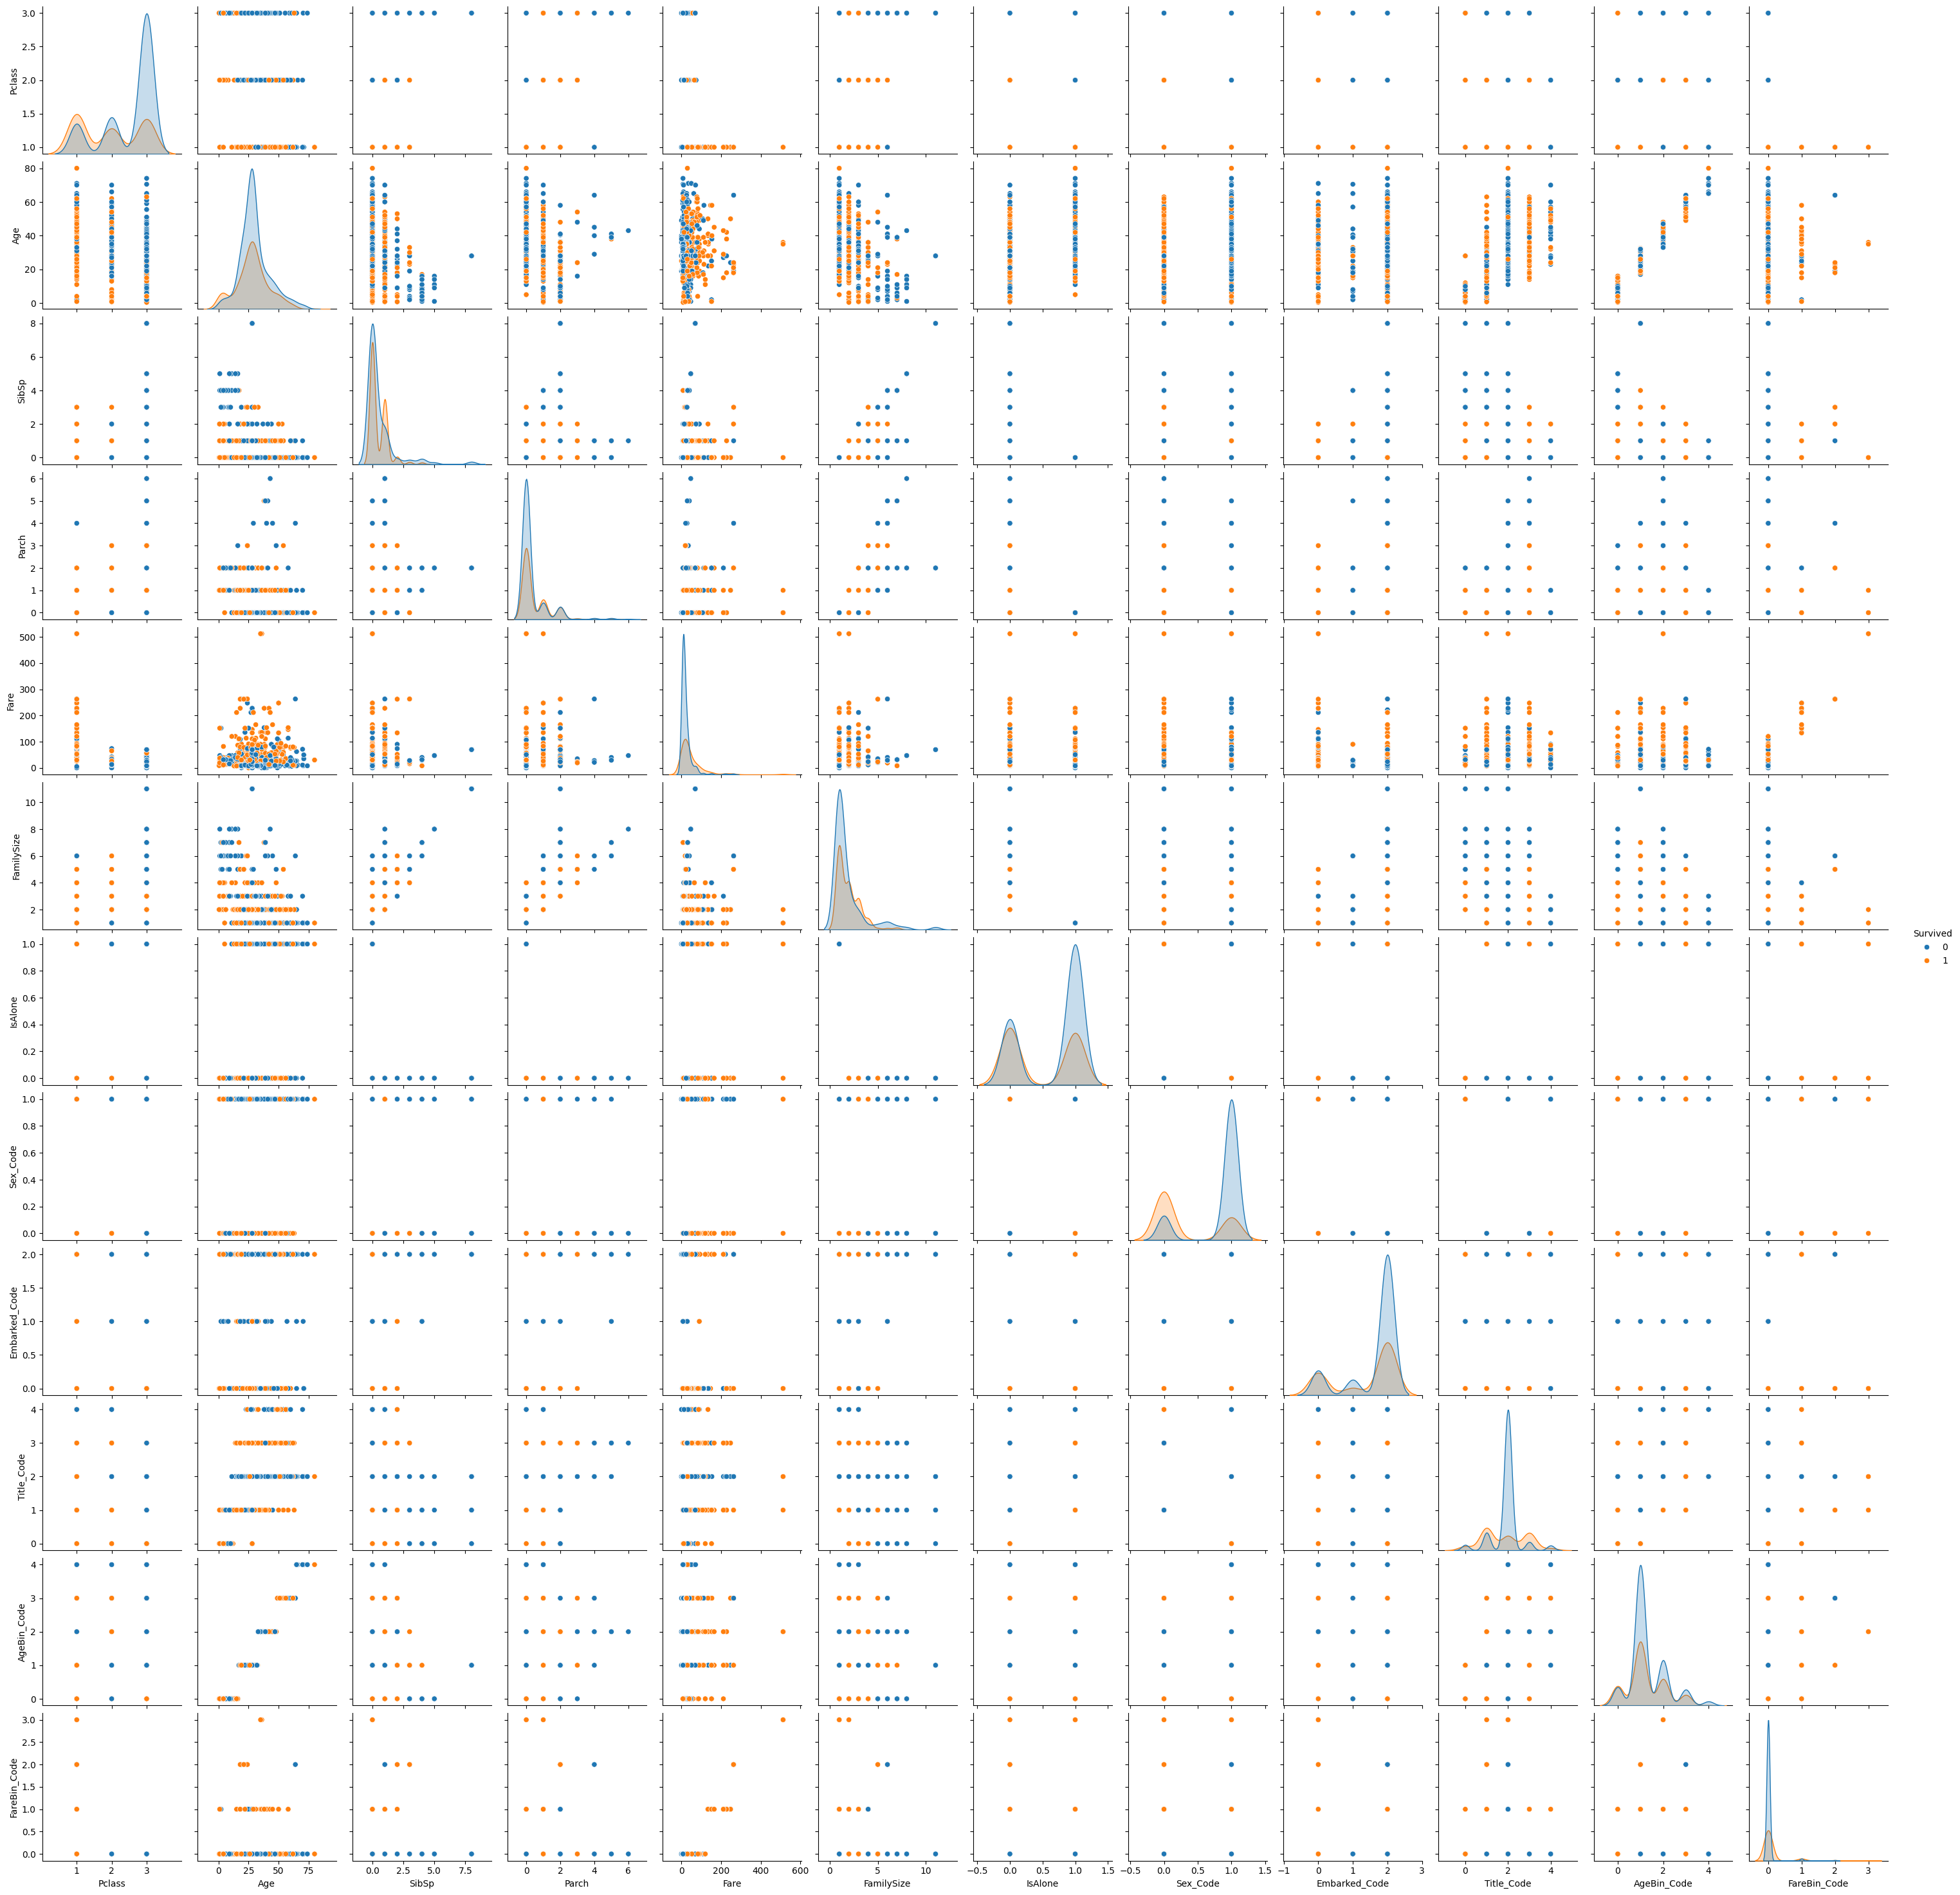

In [109]:
pair_plot = sns.pairplot(train, hue='Survived', diag_kind='kde')
pair_plot

In [132]:
# I decided to use a random forest classifier to predict the surival on the Titanic. Random forest is less prone to overfitting
train.columns
bin_features = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin',
       'Sex_Code', 'Embarked_Code', 'Title_Code', 'AgeBin_Code',
       'FareBin_Code'],
      dtype='object')

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   FamilySize     891 non-null    int64   
 10  IsAlone        891 non-null    int64   
 11  Title          891 non-null    object  
 12  AgeBin         891 non-null    category
 13  FareBin        891 non-null    category
 14  Sex_Code       891 non-null    int32   
 15  Embarked_Code  891 non-null    int32   
 16  Title_Code     891 non-null    int32   
 17  AgeBin_Code    891 non-null    int3

In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = train[bin_features] 
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [141]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("Final Classification Report:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-validation Score: 0.8131685216192258
Final Accuracy: 0.8156424581005587
Final Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



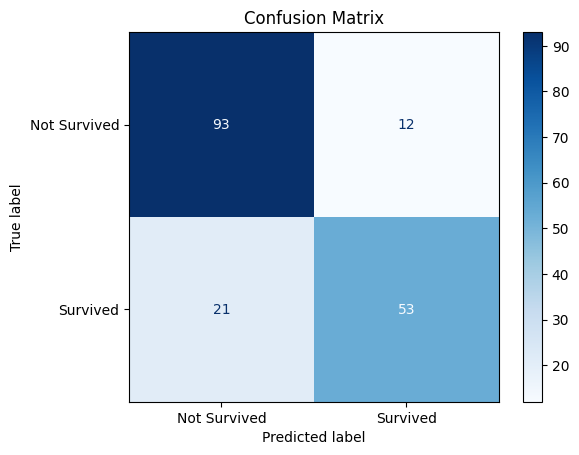

In [142]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [143]:
TN = 93
FP = 12
FN = 21
TP = 53

Accuracy = (TN + TP) / (TN + TP + FN + FP)
print("Overall Accuracy:", Accuracy)
Precision = TP / (TP + FP)
print("Precision for Survived:", Precision)
Recall = TP / (TP + FN)
print("Recall for Survived:", Recall)

Overall Accuracy: 0.8156424581005587
Precision for Survived: 0.8153846153846154
Recall for Survived: 0.7162162162162162
